# Ordinary Least Squares (OLS) regression

### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

### Start by generating some data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Set the number of regressors or futures
n_features = 1

# Set the number of observations
n_samples = 100

# Set intercept to True/False
has_intercept = True

# Generate some random features from a Uniform(0,1)
X = np.random.rand(n_samples, n_features)

# Generate the true coefficients, also from a Uniform(0,1)
coeffs = np.random.rand(n_features).round(2)

# The data generating process is y = intercept + sum_i coeff_i * x_i + 0.2*u_i
# where u_i is normally distributed error term,  N(O,1).
if has_intercept:
    intercept = np.random.rand(1).round(2)[0]
    y = intercept + np.dot(X, coeffs) + 0.2*np.random.randn(n_samples)
    y_true = intercept + np.dot(X, coeffs)
else:
    intercept = 0
    y = np.dot(X, coeffs) + 0.2*np.random.randn(n_samples)
    y_true = np.dot(X, coeffs)

In [6]:
print(f'The true coefficients are/is: {coeffs}')
if has_intercept:
    print(f'The true intercept is: {intercept}')

The true coefficients are/is: [0.08]
The true intercept is: 0.1


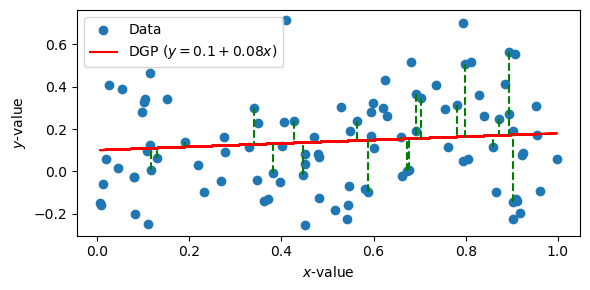

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming n_features, X, y, y_true, intercept, coeffs are already defined
if n_features == 1:
    plt.figure(figsize=(6, 3))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_true, color='red', label=f'DGP ($y={intercept} + {coeffs[0]}x$)')

    # Randomly select 20 points
    indices = np.random.choice(range(len(X)), 20, replace=False)
    for i in indices:
        # Draw line from point to regression line
        plt.plot([X[i], X[i]], [y[i], y_true[i]], color='green', linestyle='--')

    plt.legend()
    plt.xlabel('$x$-value')
    plt.ylabel('$y$-value')
    # Save the figure
    plt.tight_layout()
    plt.savefig('regression_example.png')
else:
    print('Can only plot a two-dimensional figure.')


The goal now is to recover the data generating process (DGP) by using the observed data, $X$.

### Basic OLS recap:

The ordinary least squares (OLS) method is a linear regression technique that finds the coefficients (also called weights or parameters) that minimize the sum of the squared residuals between the predicted values and the true values. Mathematically, this can be written as the following optimization problem

$$\arg\min_{\beta} \sum_{i=1}^n (y_i - \beta^T x_i)^2$$

where $x_i$ is the $i$-th feature vector, $y_i$ is the $i$-th target, $\beta$ is the coefficient vector (also called the betas). The optimal values of $\beta$ are the OLS coefficients.

To solve this optimization problem, we can set the derivative of the objective function with respect to $\beta$ to zero and solve for $\beta$. This leads to the following closed-form solution for the OLS coefficients:

$$\beta = (X^T X)^{-1} X^T y$$

where $X$ is the feature matrix with shape (n_samples, n_features), $y$ is the target vector with shape (n_samples).

We can easily solve for $\beta$ using NumPy:

In [ ]:
if has_intercept == True:
    X_ = np.column_stack((np.ones(n_samples), X))    
    betas = np.linalg.inv(X_.T@X_)@(X_.T@y)
    print(f'The estimated coefficients are: { betas[1:].round(3)}')
    print(f'The estimated intercept is: { betas[0].round(3)}')
else:
    betas = np.linalg.inv(X.T@X)@(X.T@y)
    print(f'The estimated coefficients are: { betas.round(3)}')

### Let's write a few more lines of code using OOP

We will now use object-oriented programming (OOP) when coding up the ordinary least squares (OLS) method. This is the way every serious package in Python is written, and it is smart to start to think in this framework right away.

In [8]:
class OLS:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coeffs = None
        self.intercept = None

    def fit(self, X, y):
        # Add intercept term to X if fit_intercept is True
        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])

        # Solve the least squares problem
        XTX = np.dot(X.T, X)
        XTY = np.dot(X.T, y)
        self.coeffs = np.linalg.solve(XTX, XTY)

        # Extract intercept term if fit_intercept is True
        if self.fit_intercept:
            self.intercept = self.coeffs[0]
            self.coeffs = self.coeffs[1:]

    def predict(self, X):
        # Add intercept term to X if fit_intercept is True
        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            return np.dot(X, np.hstack([self.intercept, self.coeffs]))
        return np.dot(X, self.coeffs)

In [9]:
# Then we can use the class as follows:

model = OLS(fit_intercept=has_intercept)
model.fit(X, y)
print(f'The estimated coefficients are: {model.coeffs.round(3)}')
print(f'The estimated intercept is: {model.intercept:.3f}')

The estimated coefficients are: [0.122]
The estimated intercept is: 0.066


In [10]:
model.predict(X)

array([0.07811429, 0.14660001, 0.14632312, 0.15161636, 0.11425291,
       0.17677027, 0.1325218 , 0.17378933, 0.14846368, 0.07574596,
       0.06690293, 0.08153792, 0.17594886, 0.12420191, 0.18298972,
       0.12457982, 0.13906628, 0.13842958, 0.11241483, 0.11519928,
       0.14882548, 0.15031737, 0.07988803, 0.09971571, 0.12876187,
       0.07992907, 0.08440159, 0.14208471, 0.18185607, 0.07772889,
       0.15018018, 0.13226759, 0.17218781, 0.13838926, 0.07851746,
       0.12330466, 0.16261388, 0.17051915, 0.06802178, 0.16816091,
       0.09937828, 0.17830381, 0.1669116 , 0.14245712, 0.17483229,
       0.1415272 , 0.15876968, 0.13453834, 0.17126783, 0.16113633,
       0.10595386, 0.17650357, 0.17581894, 0.15791799, 0.10837174,
       0.07230442, 0.17773859, 0.06885935, 0.09237586, 0.07544286,
       0.09854999, 0.14788147, 0.17701042, 0.1203083 , 0.07548296,
       0.12090935, 0.16273596, 0.11005283, 0.16313335, 0.07987461,
       0.13759157, 0.13673582, 0.18758273, 0.11798503, 0.18228

In [11]:
# We can also use the scikit-learn package to estimate the coefficients
import sklearn.linear_model as lm

model_sk = lm.LinearRegression(fit_intercept=has_intercept)
model_sk.fit(X, y)
print(f'The estimated coefficients are: {model_sk.coef_.round(3)}')
print(f'The estimated intercept is: {model_sk.intercept_.round(3)}')

The estimated coefficients are: [0.122]
The estimated intercept is: 0.066
